# Financial Sentiment Analysis

Dataset : https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

# Tahapan


1. Import dan Install Library
2. Data Information
3. Preprocessing
4. TFIDFVectorizer
5. Balancing Data
6. Split Data
7. Modelling
8. Evaluasi
9. WordCloud




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import dan Install Library

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# PREPROCESSING
##casefolding
import re 
##stopword
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
##stemming
from nltk.stem import PorterStemmer

# TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Balancing Data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split Data
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.svm import SVC

# Evaulate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# WordCloud
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 2. Data Information

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 5/Big Data & Data Minning/Final/data/data.csv", encoding="iso-8859-1", sep=",")

In [ ]:
df.count()

Sentence     5842
Sentiment    5842
dtype: int64

In [ ]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


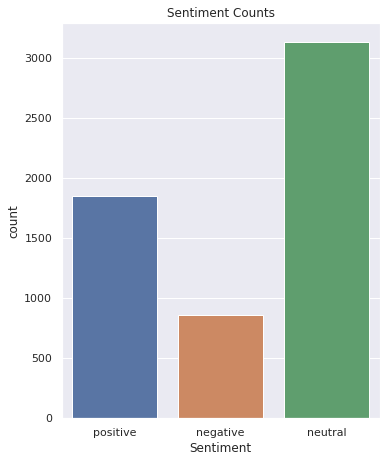

In [ ]:
sns.set(rc={'figure.figsize':(5.7,7.27)})
fig2 = sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Counts')
plot = fig2.get_figure()

## 3. Pre-processing

In [ ]:
# Menghapus Data Kosong
df = df.dropna()

In [ ]:
# Menghapus Data Duplicate
df = df.drop_duplicates()

In [ ]:
# Melihat class y yang akan diprediksi
df["Sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

### a. Create Pre-processing

In [ ]:
#casefolding (merubah text menjadi lowercase)
def casefolding(text):
  text = text.lower()
  text = re.sub(r'\d+','', text)
  text = re.sub(r'[!@#$%^&*)(-_=+\;,./{}|:<>?"ù÷ù÷ù÷]','',text)
  text = text.strip()
  return text

#tokenizing (setiap kata diurutkan dan dipisah, seperti indexing pada array)
def token(text):
  nstr = text.split()
  dat = []
  a = -1
  for hu in nstr:
    a = a+1
  if hu == '':
    dat.append(a)
  p=0
  b=0
  for q in dat:
    b = q - p
    del nstr[b]
    p = p + 1
  return nstr

#stopword (menghilangkan kata yang tidak digunakan dan tidak bermanfaat - misalnya ke, di, yang dll.)
def stopword_removal(text):
  filtering = stopwords.words('english')
  x = []
  data = []
  def myFunc(x):
    if x in filtering:
      return False
    else:
      return True
  fit = filter(myFunc, text)
  for x in fit:
    data.append(x)
  return data

#stemming (merubah setiap kata jadi kata dasar dan menghilangkan imbuhan)
def stemming(text):
  stemmer = PorterStemmer()
  do = []
  for w in text:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean=[]
  d_clean=" ".join(do)
  return(d_clean)

### b. Start Pre-processing

In [ ]:
df['Sentence'] = df['Sentence'].apply(casefolding)
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta 's net sa...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [ ]:
df['Sentence']=df['Sentence'].apply(token)
df.head()

,Sentence,Sentiment
0,"[the, geosolutions, technology, will, leverage...",positive
1,"[esi, on, lows, down, to, bk, a, real, possibi...",negative
2,"[for, the, last, quarter, of, componenta, 's, ...",positive
3,"[according, to, the, finnishrussian, chamber, ...",neutral
4,"[the, swedish, buyout, firm, has, sold, its, r...",neutral


In [ ]:
df['Sentence']=df['Sentence'].apply(stopword_removal)
df.head()

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, lows, bk, real, possibility]",negative
2,"[last, quarter, componenta, 's, net, sales, do...",positive
3,"[according, finnishrussian, chamber, commerce,...",neutral
4,"[swedish, buyout, firm, sold, remaining, perce...",neutral


In [ ]:
df['Sentence'] = df['Sentence'].apply(stemming)
df.head()

,Sentence,Sentiment
0,geosolut technolog leverag benefon 's gp solut...,positive
1,esi low bk real possibl,negative
2,last quarter componenta 's net sale doubl eurm...,positive
3,accord finnishrussian chamber commerc major co...,neutral
4,swedish buyout firm sold remain percent stake ...,neutral


## 4. TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()

In [ ]:
X = tf.fit_transform(df['Sentence'].astype('U'))
y = df['Sentiment']

## 5. Balancing Data
Seperti yang sudah saya tampilkan pada bab data information, jika data yang saya miliki imbalance yang cukup besar. Maka dari itu saya akan melakukan balancing data menggunakan SMOTE

In [ ]:
# Balancing Data
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [ ]:
dataPlot = [tuple(row) for row in y]
countsPlot = [count for index, count in Counter(dataPlot).items()]

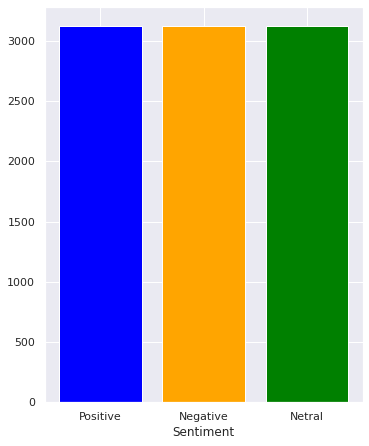

In [ ]:
# Plot the data
fig, ax = plt.subplots()
ax.bar(["Positive", "Negative", "Netral"], countsPlot,
       color=["Blue", "Orange", "Green"])
ax.set_xlabel("Sentiment")
plt.show()

## 6. Split Data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X, y, train_size=0.8,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7497, 8295) (7497,)
(1875, 8295) (1875,)


## 7. Modelling

In [ ]:
modelSVM=SVC(kernel='linear', probability=True)
modelSVM.fit(x_train, y_train)
predictedSVM = modelSVM.predict(x_test)

## Evaluasi

SVM Accuracy : 0.8309333333333333

              precision    recall  f1-score   support

    negative       0.78      0.94      0.85       623
     neutral       0.86      0.72      0.78       642
    positive       0.87      0.83      0.85       610

    accuracy                           0.83      1875
   macro avg       0.84      0.83      0.83      1875
weighted avg       0.84      0.83      0.83      1875



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


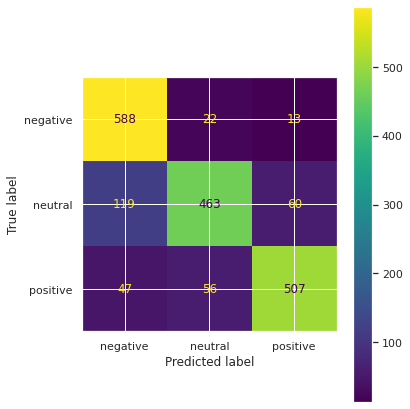

In [ ]:
print(f'SVM Accuracy : {accuracy_score(y_test,predictedSVM)}')
print('=========================================================\n')
print(classification_report(y_test,predictedSVM,zero_division=0))
plot_confusion_matrix(modelSVM, x_test, y_test)  
plt.show()

In [ ]:
predictedSVM

array(['negative', 'positive', 'neutral', ..., 'positive', 'negative',
       'negative'], dtype=object)

## WordCloud

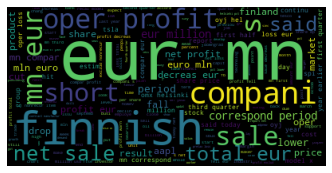

In [ ]:
#wordcloud Negative
df_pos = df[df['Sentiment'].str.contains("negative")]
wordcloud_negative = WordCloud().generate(' '.join(df_pos['Sentence']))
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.show()

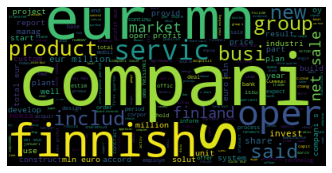

In [ ]:
#Wordcloud Neutral
df_pos = df[df['Sentiment'].str.contains("neutral")]
wordcloud_neutral = WordCloud().generate(' '.join(df_pos['Sentence']))
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.show()

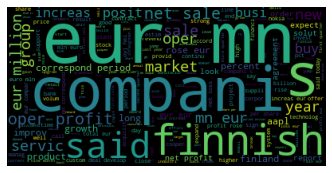

In [ ]:
#Wordcloud Positive
df_pos = df[df['Sentiment'].str.contains("positive")]
wordcloud_positive = WordCloud().generate(' '.join(df_pos['Sentence']))
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.show()